In [1]:
import spacy
import nltk
from top2vec import Top2Vec
import os

In [2]:
data = {}
documents = []

for folder in os.listdir('data'):
    for file in os.listdir('data/' + folder):
        with open('data/' + folder + '/' + file, 'r', encoding="utf-8") as f:
            data[file] = f.read()

In [ ]:
import contractions
import re
import spacy
import nltk

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
# don't remove stopwords that could impact the model
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

In [9]:
def preprocess(text):
    text = text.lower()
    text = re.sub('(<[\w\s]*/?>)', "", text)
    text = contractions.fix(text)
    text = re.sub('[^a-zA-Z0-9\s]+', "", text)
    text = re.sub('\d+', "", text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.tag_ != 'PUNCT']
    text = ' '.join([token for token in tokens if token not in stopwords])
    text = re.sub('\s+', " ", text)
    return text

In [10]:
for key in data.keys():
    data[key] = preprocess(data[key])

In [3]:
model = Top2Vec(documents=list(data.values()), speed="learn", workers=12, embedding_model='universal-sentence-encoder')

2022-10-30 10:52:32,674 - top2vec - INFO - Pre-processing documents for training
e:\Ebay_K\Top2Vec\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-10-30 10:52:34,732 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-10-30 10:53:02,661 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-10-30 10:55:03,305 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-10-30 10:55:09,627 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-10-30 10:55:09,632 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [14]:
reduced_vectors = model.topic_vectors_reduced

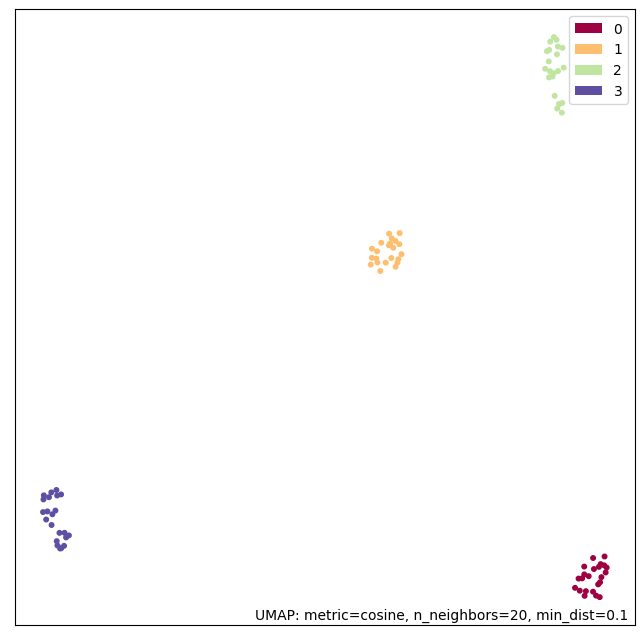

In [4]:
import umap.plot

umap_args_model = {
"n_neighbors": 20,
"n_components": 2,
"metric": "cosine",
'min_dist':0.10,
'spread':1
}
umap_model = umap.UMAP(**umap_args_model).fit(model.document_vectors)
umap_fig2 = umap.plot.points(umap_model, labels = model.doc_top)

In [5]:
model.topic_words

array([['margin', 'capex', 'bullish', 'invested', 'leveraging',
        'turnover', 'increasing', 'increases', 'improvements',
        'dividend', 'citigroup', 'incremental', 'leverage', 'quarterly',
        'increase', 'increased', 'cfo', 'earnings', 'profitability',
        'llc', 'dividends', 'lifo', 'revenues', 'accounting',
        'acquisitions', 'expanding', 'forward', 'progress',
        'improvement', 'shareholders', 'rollout', 'asset', 'segment',
        'metrics', 'significant', 'gaap', 'inventory', 'efficiencies',
        'momentum', 'closing', 'impact', 'spending', 'raise', 'measure',
        'revenue', 'largest', 'advance', 'larger', 'expansion',
        'materially'],
       ['bullish', 'leverage', 'growth', 'invested', 'capex',
        'leveraging', 'margin', 'forward', 'increasing', 'citigroup',
        'segment', 'expansion', 'expanding', 'increase', 'llc',
        'increases', 'pharma', 'dividend', 'quarterly', 'analysts',
        'earnings', 'uncertainties', 'analys